In [66]:
# ================================================
# 1. Importar librerías y función de carga de datos
# ================================================
import sys
sys.path.append("../src")  

from Carga_datos import load_data_from_bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ================================================
# 2. Cargar los datos
# ================================================
df = load_data_from_bigquery()
df.head()


c:\Users\ADA IMARA\Desktop\Universidad\Septimo_v2_semestre\cdp\Final\EntregaFinal_cdp\EntregaFinal_cdp-venv\Lib\site-packages\google\auth\_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\ADA IMARA\Desktop\Universidad\Septimo_v2_semestre\cdp\Final\EntregaFinal_cdp\EntregaFinal_cdp-venv\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


✅ Datos cargados correctamente desde BigQuery


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2586712032,Aaron,Terry,42.0,Masculino,NYC,Bajo,1,19.41,Sí,No,Vegetariano,No,8914894420,None,Efectivo,807
1,8083396378,Aaron,Edwards,23.0,Masculino,Dallas,Bajo,0,0.00,Sí,Sí,Carnes,No,001-821-337-4847x28301,None,Tarjeta,878
2,1492119727,Aaron,Mason,24.0,Masculino,Houston,Bajo,1,8.56,No,Sí,Mariscos,No,489-471-9165,jason75@example.net,Tarjeta,924
3,9988027682,Aaron,Kennedy,24.0,Masculino,Boston,Bajo,2,7.65,No,Sí,Pescado,No,None,gonzalezryan@example.net,Efectivo,928
4,6902077458,Aaron,Gomez,26.0,Masculino,Denver,Bajo,3,11.72,No,Sí,Carnes,No,383.356.2737,None,Tarjeta,946


In [67]:
#Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  Int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  Int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

In [68]:
#Información estadística básica de las variables numéricas
df.describe()

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,30000.0,29899.000000,30000.0,29855.000000,30000.0
mean,5504764563.8191,49.665006,3.896133,32.603452,5389.755867
std,2602799263.541167,23.839550,2.741532,26.402601,4538.491728
min,1000153386.0,-5.000000,-3.0,0.000000,800.0
25%,3243617026.0,33.000000,2.0,13.290000,1860.0
50%,5515865060.0,49.000000,4.0,25.510000,3402.0
75%,7754425564.0,65.000000,5.0,44.400000,7761.0
max,9999627377.0,300.000000,10.0,149.970000,17999.0


In [69]:
#Eliminamos las columnas irrelevantes para el estudio
df = df.drop(columns=["id_persona", "nombre", "apellido", "telefono_contacto", "correo_electronico"])

In [70]:
# =======================================
# CONVERSIÓN DE VARIABLES OBJECT A CATEGORY
# =======================================

cols_obj = df.select_dtypes(include="object").columns
df[cols_obj] = df[cols_obj].astype("category")

print("✅ Conversión a tipo category completada.")

✅ Conversión a tipo category completada.


======================================
## Gráficos para variables numéricas
======================================


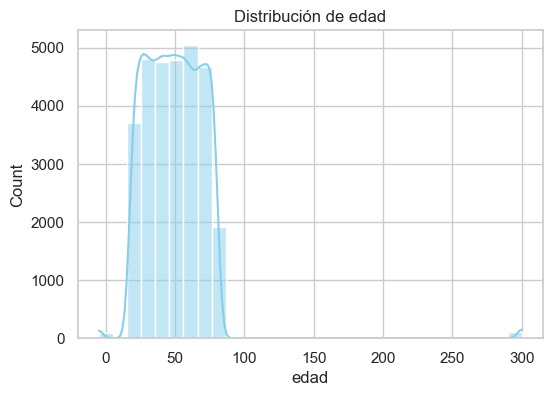

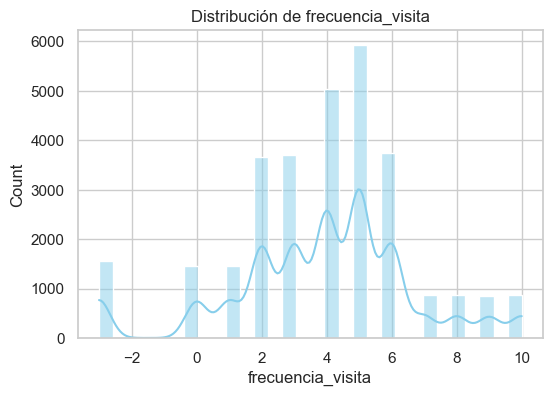

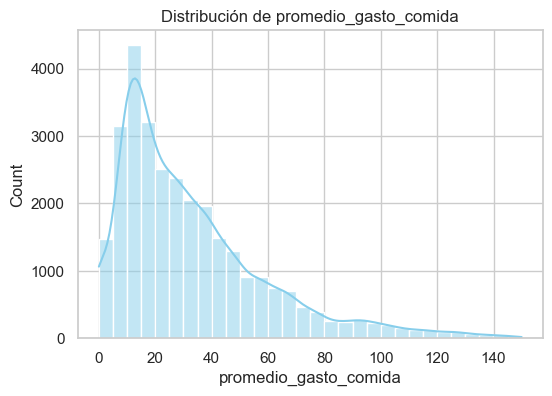

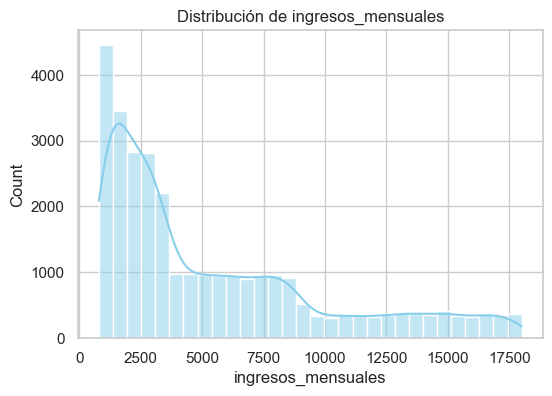

In [71]:
num_cols = ["edad", "frecuencia_visita", "promedio_gasto_comida","ingresos_mensuales"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.show()



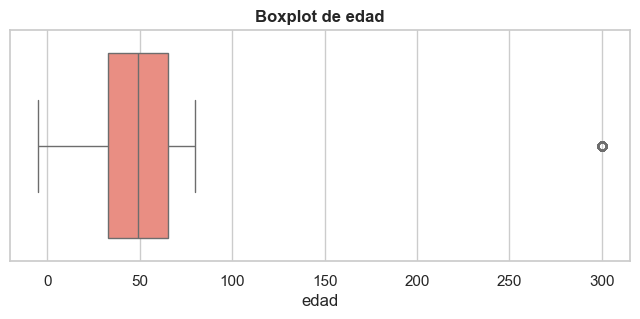

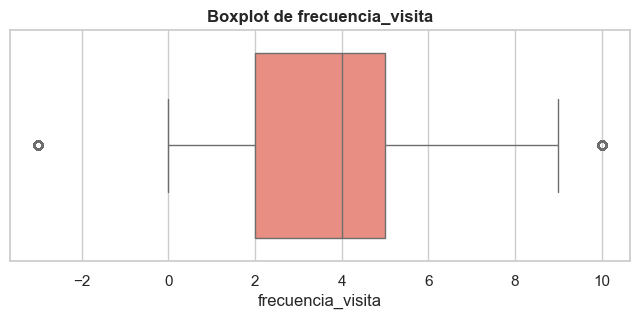

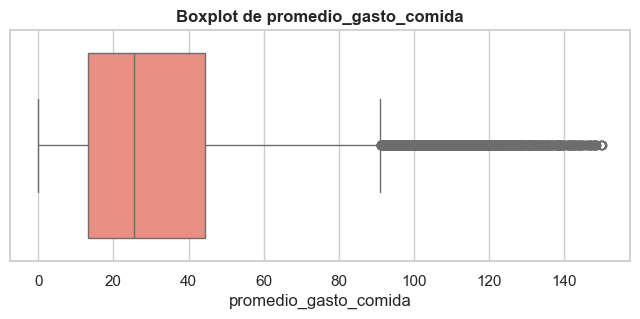

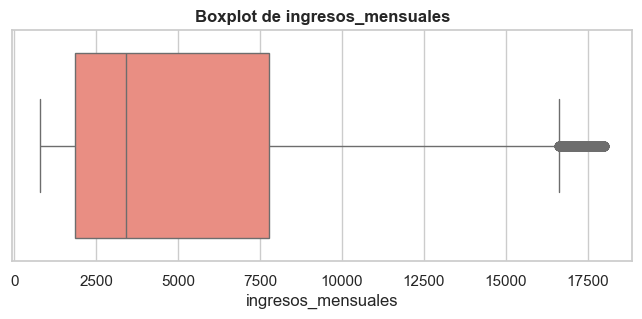

In [72]:
##Boxplots 

# Configuración general de estilo
sns.set(style="whitegrid", palette="pastel")

# Crear un boxplot por variable
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"Boxplot de {col}", fontsize=12, weight="bold")
    plt.xlabel(col)
    plt.show()

📊 1. Variable de edad

La variable edad presenta una concentración principal entre los 20 y 90 años. Se observa un valor atípico alrededor de los 300 años, que claramente representa un error o outlier. 

📊 2. Variable frecuencia_visita

La variable frecuencia_visita muestra una mayor concentración de observaciones entre los valores 3 y 6, lo cual sugiere que la mayoría de los clientes visitan el restaurante con una frecuencia media o moderada. Se evidencian algunos valores atípicos negativos. El rango intercuartílico se sitúa aproximadamente entre 2 y 5, mostrando que la mayoría de los usuarios tienen una frecuencia media de visitas.

📊 3. Variable promedio_gasto_comida

El promedio_gasto_comida tiene una distribución sesgada hacia la derecha (positivamente asimétrica). La mayoría de los clientes gastan entre 10.000 y 40.000  pero existe una cola larga hacia valores altos (más de 100), indicando la presencia de clientes con grandes gastos  o registros fuera del comportamiento típico.

📊 4. Variable ingresos_mensuales

Los ingresos_mensuales también presentan una asimetría positiva, con la mayoría de los valores concentrados entre 1000 y 5000, y una cola larga que llega hasta los 18000. Este patrón sugiere una población con predominio de ingresos medios y un grupo reducido de personas con ingresos muy altos.

# =======================================
# GRÁFICOS DE BARRAS PARA VARIABLES CATEGÓRICAS
# =======================================


C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


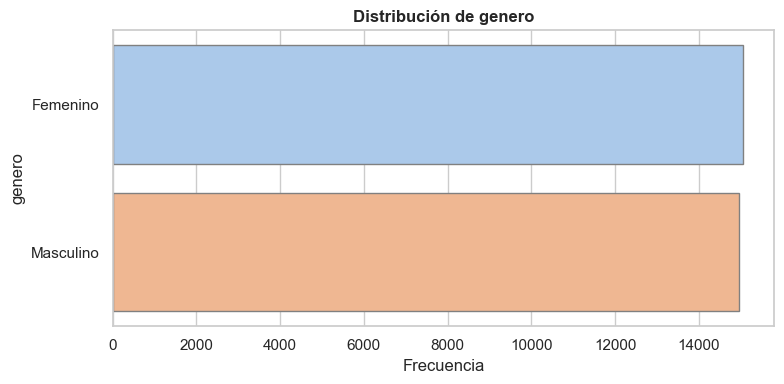

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


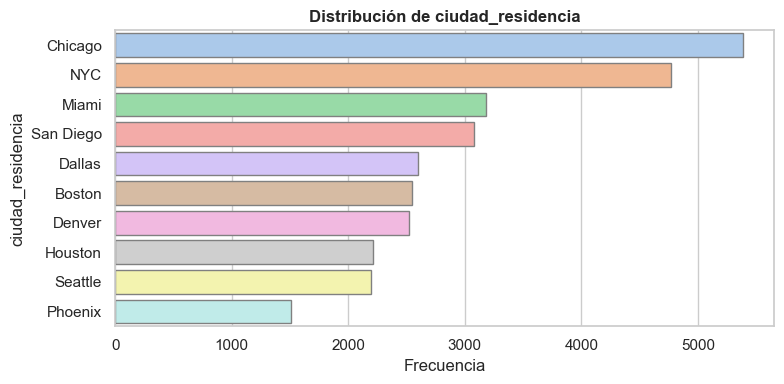

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


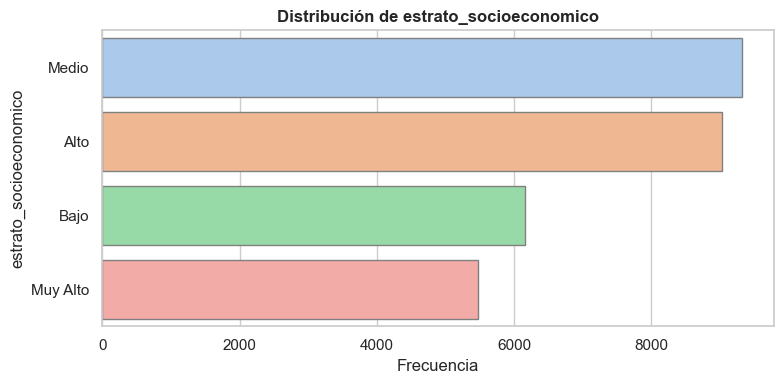

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


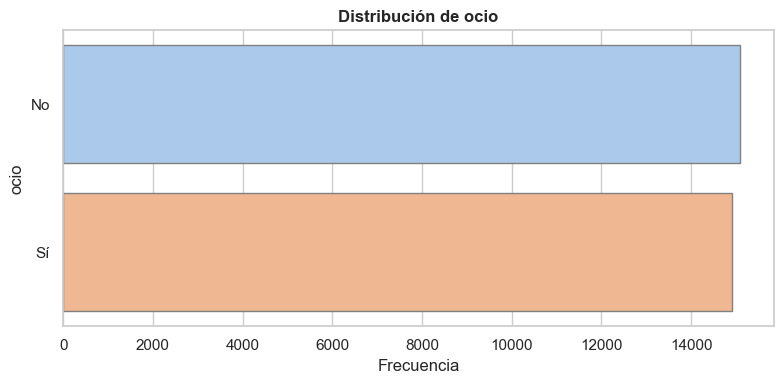

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


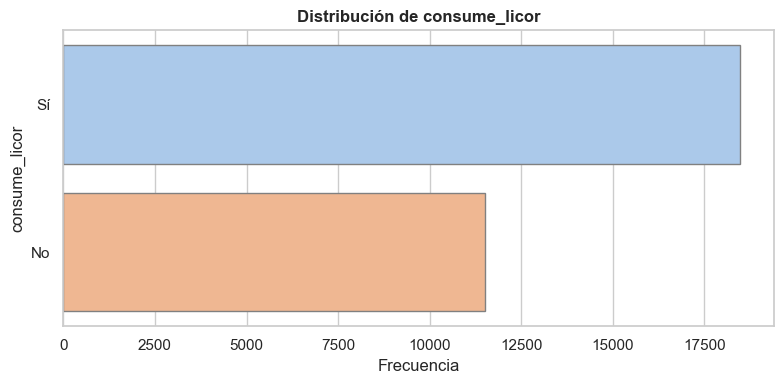

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


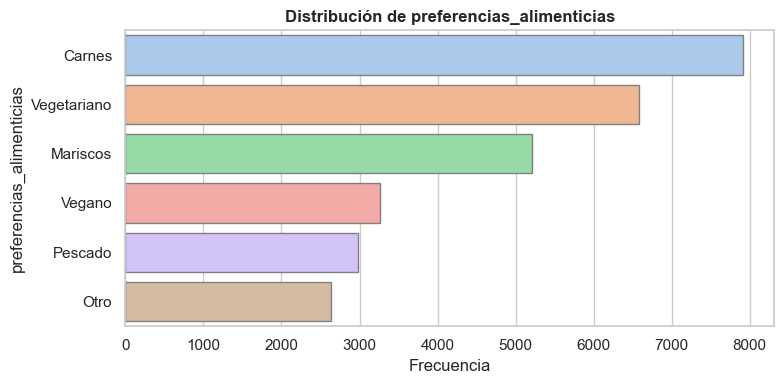

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


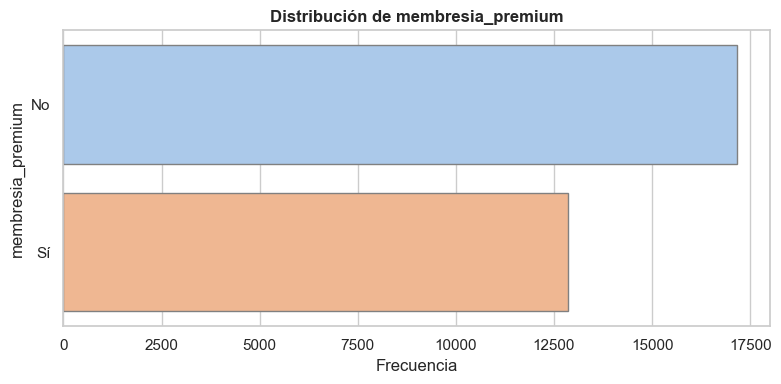

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\703884501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")


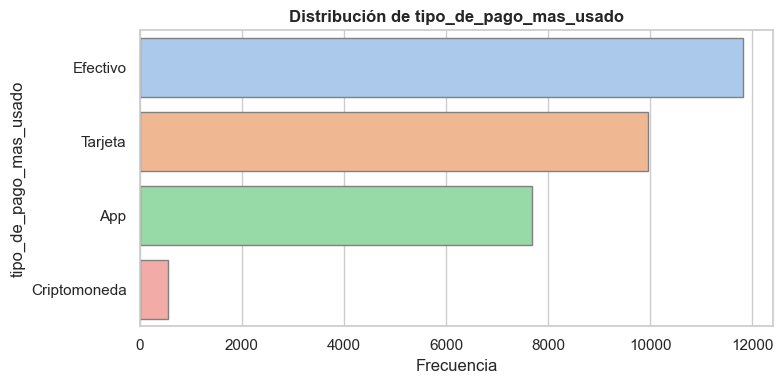

In [73]:


# Identificar las variables categóricas 
cat_cols = df.select_dtypes(include="category").columns

# Estilo visual
sns.set(style="whitegrid", palette="muted")

# Crear un gráfico por cada variable categórica
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index  # Ordenar de mayor a menor frecuencia
    sns.countplot(y=df[col], order=order, palette="pastel", edgecolor="gray")
    plt.title(f"Distribución de {col}", fontsize=12, weight="bold")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


 1. Distribución de género

La variable género está equilibrada, con una proporción casi igual de hombres y mujeres. 

2.  Distribución de ciudad_residencia

En cuanto a la ciudad de residencia, se observa que Chicago y Nueva York (NYC) son las ciudades con mayor número de clientes, seguidas por Miami, San Diego y Dallas.

3. Distribución de estrato_socioeconomico

La mayoría de los clientes pertenecen al estrato medio, seguido del alto, lo cual sugiere que el restaurante tiene un alcance principalmente en clases medias y medias-altas. Los estratos bajo y muy alto presentan menor participación, aunque mantienen una representación considerable.

4. Distribución de ocio

La variable muestra una distribución balanceada entre las categorías Sí y No, lo que indica que la mitad de los usuarios dedica tiempo al ocio y la otra mitad no. 

5. Distribución de consume_licor

Se observa que la mayoría de los usuarios sí consumen licor, lo cual podría estar asociado con un mayor gasto promedio y una frecuencia de visita más alta, especialmente si el restaurante ofrece productos relacionados. 

6. Distribución de preferencias_alimenticias

Las carnes son la preferencia predominante, seguidas por opciones vegetarianas y de mariscos. Las categorías vegano, pescado y otro presentan menor representación. 

7.  Distribución de membresía_premium

La proporción de clientes con membresía premium es ligeramente menor que la de quienes no la poseen, lo cual indica una tasa moderada de adopción del programa. 

8.  Distribución de tipo_de_pago_mas_usado

El efectivo es el método de pago más común, seguido de tarjeta y aplicaciones digitales. El uso de criptomonedas no es tan común. 


## Limpieza de atípicos para mejorar análisis bivariable y multivariable

In [74]:
#Limpieza de datos atípicos
df.loc[(df["edad"] < 16) | (df["edad"] > 100), "edad"] = np.nan
df.loc[df["frecuencia_visita"] < 0, "frecuencia_visita"] = np.nan

print("✅ Atípicos reemplazados por NaN.")

✅ Atípicos reemplazados por NaN.


In [75]:
# =======================================
# REVISIÓN DE VALORES NULOS (UNIFICADA)
# =======================================
nulos = (
    df.isnull()
    .sum()
    .reset_index()
    .rename(columns={"index": "columna", 0: "nulos"})
)
nulos["porcentaje"] = round((nulos["nulos"] / len(df)) * 100, 2)
nulos = nulos[nulos["nulos"] > 0].sort_values("nulos", ascending=False)
nulos


,columna,nulos,porcentaje
4,frecuencia_visita,1547,5.16
8,preferencias_alimenticias,1403,4.68
0,edad,308,1.03
5,promedio_gasto_comida,145,0.48


In [76]:
# =======================================
# UNIFICAR VALORES NULOS (FORMATO)
# =======================================
# Reemplazar textos que representan nulos por np.nan
df.replace(
    ["NaN", "nan", "NULL", "Null", "null", "None", "none", "", " "],
    np.nan,
    inplace=True
)

print("✅ Valores nulos unificados.")

✅ Valores nulos unificados.


In [77]:

df = df.copy(deep=True)
print("🔁 DataFrame desbloqueado para imputaciones.") 

# =====================================================
# IMPUTACIÓN DE VALORES NULOS
# =====================================================

# Imputación numérica por mediana
variables_numericas = ["edad", "frecuencia_visita", "promedio_gasto_comida"]
for var in variables_numericas:
    mediana = df[var].median()
    df[var].fillna(mediana, inplace=True)
    print(f"✅ '{var}' imputada con la mediana: {round(mediana, 2)}")

# Categóricos → moda
if "preferencias_alimenticias" in df.columns:
    moda = df["preferencias_alimenticias"].mode()[0]
    df["preferencias_alimenticias"].fillna(moda, inplace=True)
    print(f"✅ 'preferencias_alimenticias' imputada con la moda: {moda}")

# =======================================
# Verificación final
# =======================================
print("\n📋 Valores nulos restantes por columna:")
print(df.isnull().sum())

🔁 DataFrame desbloqueado para imputaciones.
✅ 'edad' imputada con la mediana: 49.0
✅ 'frecuencia_visita' imputada con la mediana: 4.0
✅ 'promedio_gasto_comida' imputada con la mediana: 25.51
✅ 'preferencias_alimenticias' imputada con la moda: Carnes

📋 Valores nulos restantes por columna:
edad                         0
genero                       0
ciudad_residencia            0
estrato_socioeconomico       0
frecuencia_visita            0
promedio_gasto_comida        0
ocio                         0
consume_licor                0
preferencias_alimenticias    0
membresia_premium            0
tipo_de_pago_mas_usado       0
ingresos_mensuales           0
dtype: int64


C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3460153447.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(mediana, inplace=True)
C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3460153447.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Análisis bivariable

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\1928493293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="membresia_premium", data=df, palette="pastel")


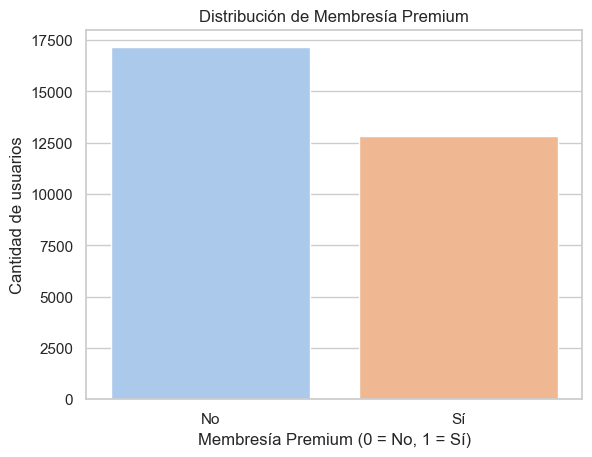

In [81]:
sns.countplot(x="membresia_premium", data=df, palette="pastel")
plt.title("Distribución de Membresía Premium")
plt.xlabel("Membresía Premium (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de usuarios")
plt.show()


C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3498982791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="membresia_premium", y=col, data=df, palette="pastel")


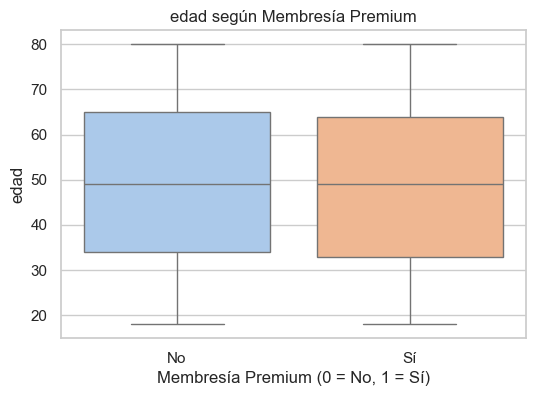

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3498982791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="membresia_premium", y=col, data=df, palette="pastel")


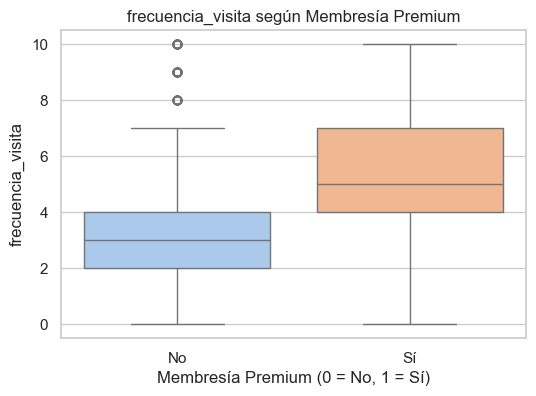

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3498982791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="membresia_premium", y=col, data=df, palette="pastel")


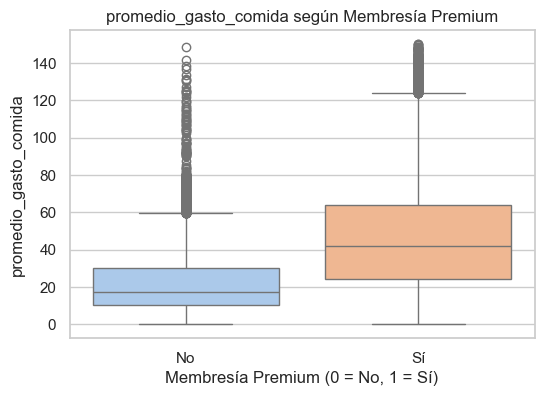

C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3498982791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="membresia_premium", y=col, data=df, palette="pastel")


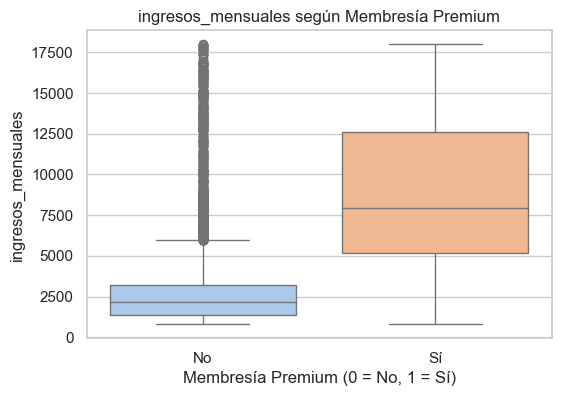

In [78]:
#Númericas
num_cols = ["edad", "frecuencia_visita", "promedio_gasto_comida", "ingresos_mensuales"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="membresia_premium", y=col, data=df, palette="pastel")
    plt.title(f"{col} según Membresía Premium")
    plt.xlabel("Membresía Premium (0 = No, 1 = Sí)")
    plt.ylabel(col)
    plt.show()


Distribución de Membresía Premium (gráfico comparativo)

El gráfico confirma que una mayor cantidad de usuarios no son premium. Sin embargo, la diferencia no es mucha, lo que implica que una parte significativa de los clientes ha decidido invertir en el programa.

1. Edad según Membresía Premium

No se observan diferencias significativas entre los grupos. Tanto los usuarios con como sin membresía premium presentan edades medianas similares (alrededor de los 45–50 años). Esto sugiere que la edad no es un factor determinante en la adopción de la membresía.

2. Frecuencia de visita según Membresía Premium

Los usuarios premium registran una mayor frecuencia de visita que los no premium. 

3.  Promedio de gasto en comida según Membresía Premium

Los clientes premium presentan un promedio de gasto significativamente más alto en comparación con los no premium. Esto confirma que la membresía está asociada con un comportamiento de consumo más activo.  

4. Ingresos mensuales según Membresía Premium

Se evidencia una diferencia clara entre ambos grupos. Los usuarios con membresía premium presentan ingresos significativamente más altos, con una mediana cercana a los 8.000, mientras que los no premium se concentran alrededor de los 2.500. 

5. Género según Membresía Premium

La distribución por género es relativamente equilibrada, aunque ligeramente superior en hombres. Tanto en el grupo masculino como en el femenino, se observa una menor proporción de usuarios premium respecto a los no premium.

6. Ciudad de residencia según Membresía Premium

Las ciudades con mayor concentración de usuarios premium son NYC y Miami, seguidas de Chicago. En contraste, Boston, Phoenix y Seattle muestran una menor proporción de membresías premium.

7.Estrato socioeconómico según Membresía Premium

Existe una relación notable entre el estrato socioeconómico y la adquisición de la membresía. Los usuarios de estratos alto y muy alto son los que más acceden al plan premium, mientras que en los estratos medio y bajo predomina la ausencia de membresía. 

8. Ocio según Membresía Premium

Las personas que declaran tener actividades de ocio presentan una mayor proporción de membresías premium, mientras que quienes no realizan actividades de ocio tienden a no tenerla. 

9. Consumo de licor según Membresía Premium

Quienes sí consumen licor tienden a tener una mayor proporción de membresías premium. 

10. Preferencias alimenticias según Membresía Premium

Los usuarios que prefieren carnes y comidas vegetarianas son los que más poseen membresía premium. En cambio, las categorías vegano, mariscos, pescado y otros tienen menor representación. 

11. Tipo de pago más usado según Membresía Premium

Los usuarios premium utilizan tarjeta o aplicaciones móviles con mayor frecuencia que los no premium, quienes prefieren el efectivo. 

In [82]:
df.groupby("membresia_premium")[num_cols].mean().round(2)


C:\Users\ADA IMARA\AppData\Local\Temp\ipykernel_15712\3384681275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("membresia_premium")[num_cols].mean().round(2)


,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
membresia_premium,,,,
No,49.10,3.13,21.47,2806.93
Sí,48.68,5.76,47.39,8839.22


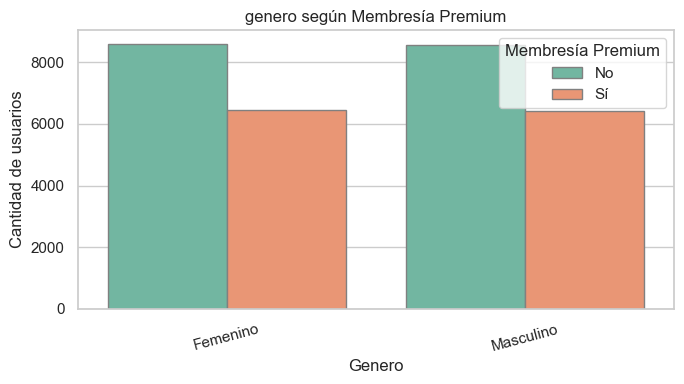

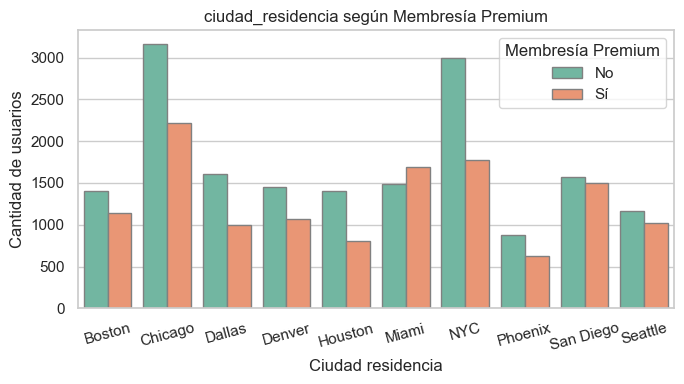

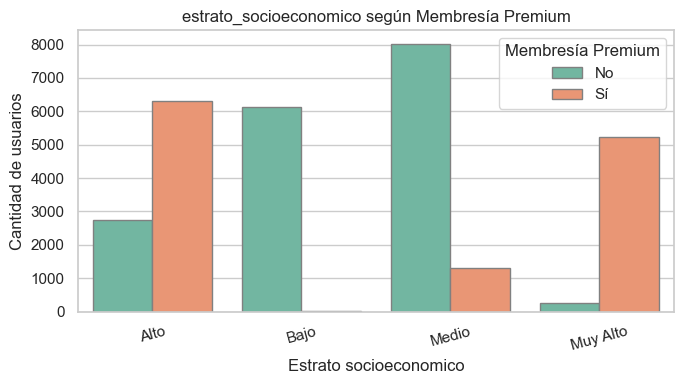

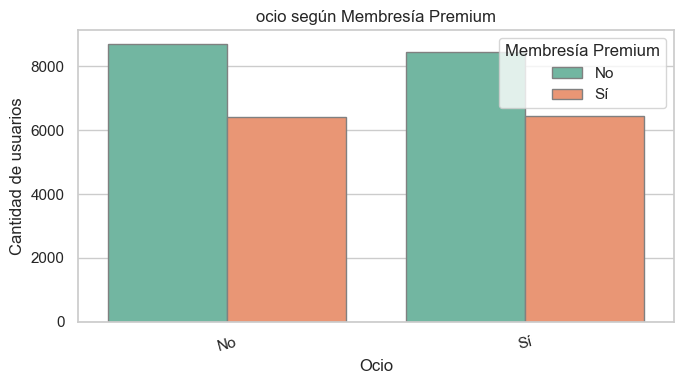

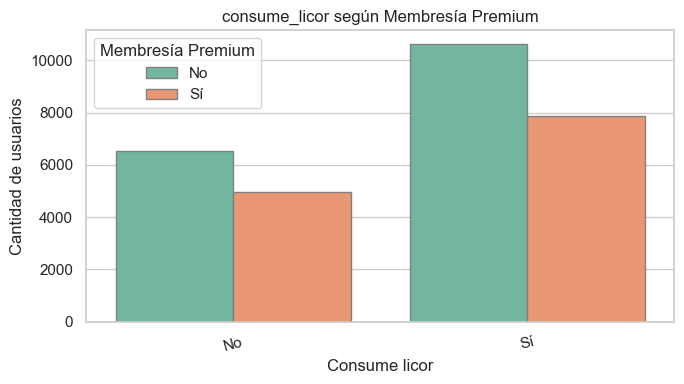

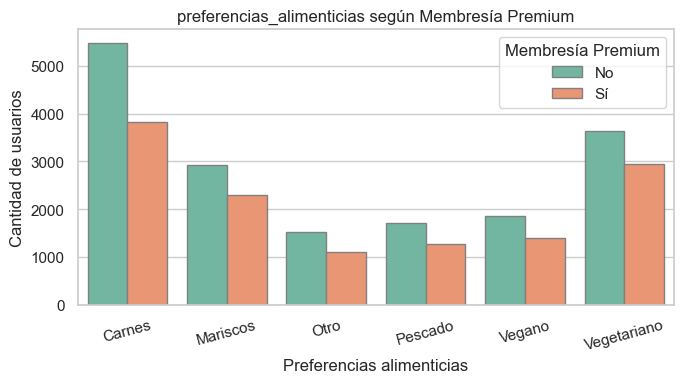

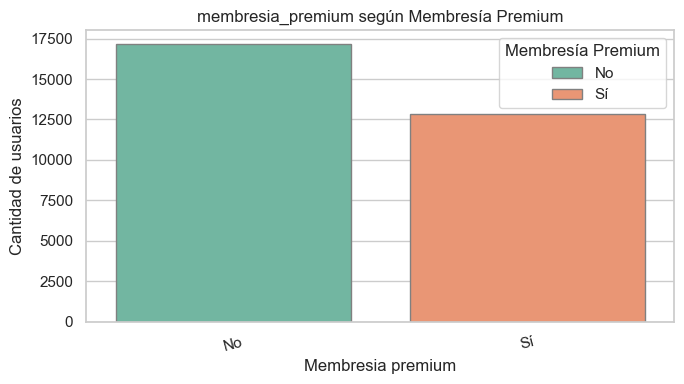

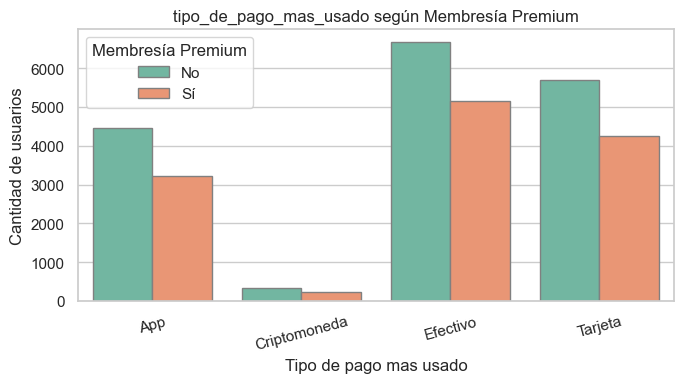

In [83]:
#Categóricas
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(
        data=df,
        x=col,
        hue="membresia_premium",
        palette="Set2",
        edgecolor="gray"
    )
    plt.title(f"{col} según Membresía Premium")
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel("Cantidad de usuarios")
    plt.xticks(rotation=15)
    plt.legend(title="Membresía Premium", labels=["No", "Sí"])
    plt.tight_layout()
    plt.show()


1. Género según Membresía Premium

La distribución por género es relativamente equilibrada, aunque ligeramente superior en hombres. Tanto en el grupo masculino como en el femenino, se observa una menor proporción de usuarios premium respecto a los no premium.

2. Ciudad de residencia según Membresía Premium

Las ciudades con mayor concentración de usuarios premium son NYC y Miami, seguidas de Chicago. En contraste, Boston, Phoenix y Seattle muestran una menor proporción de membresías premium.

3.Estrato socioeconómico según Membresía Premium

Existe una relación notable entre el estrato socioeconómico y la adquisición de la membresía. Los usuarios de estratos alto y muy alto son los que más acceden al plan premium, mientras que en los estratos medio y bajo predomina la ausencia de membresía. 

4. Ocio según Membresía Premium

Las personas que declaran tener actividades de ocio presentan una mayor proporción de membresías premium, mientras que quienes no realizan actividades de ocio tienden a no tenerla. 

5. Consumo de licor según Membresía Premium

Quienes sí consumen licor tienden a tener una mayor proporción de membresías premium. 

6. Preferencias alimenticias según Membresía Premium

Los usuarios que prefieren carnes y comidas vegetarianas son los que más poseen membresía premium. En cambio, las categorías vegano, mariscos, pescado y otros tienen menor representación. 

7. Tipo de pago más usado según Membresía Premium

Los usuarios premium utilizan tarjeta o aplicaciones móviles con mayor frecuencia que los no premium, quienes prefieren el efectivo. 

In [84]:
for col in cat_cols:
    tabla = pd.crosstab(df[col], df["membresia_premium"], normalize="index") * 100
    print(f"\n📊 Distribución porcentual de Membresía Premium según {col}:")
    display(tabla.round(2))



📊 Distribución porcentual de Membresía Premium según genero:


membresia_premium,No,Sí
genero,,
Femenino,57.17,42.83
Masculino,57.19,42.81



📊 Distribución porcentual de Membresía Premium según ciudad_residencia:


membresia_premium,No,Sí
ciudad_residencia,,
Boston,55.28,44.72
Chicago,58.86,41.14
Dallas,61.88,38.12
Denver,57.67,42.33
Houston,63.47,36.53
Miami,46.83,53.17
NYC,62.78,37.22
Phoenix,58.37,41.63
San Diego,51.15,48.85



📊 Distribución porcentual de Membresía Premium según estrato_socioeconomico:


membresia_premium,No,Sí
estrato_socioeconomico,,
Alto,30.29,69.71
Bajo,99.56,0.44
Medio,86.05,13.95
Muy Alto,4.73,95.27



📊 Distribución porcentual de Membresía Premium según ocio:


membresia_premium,No,Sí
ocio,,
No,57.61,42.39
Sí,56.76,43.24



📊 Distribución porcentual de Membresía Premium según consume_licor:


membresia_premium,No,Sí
consume_licor,,
No,56.74,43.26
Sí,57.46,42.54



📊 Distribución porcentual de Membresía Premium según preferencias_alimenticias:


membresia_premium,No,Sí
preferencias_alimenticias,,
Carnes,58.87,41.13
Mariscos,55.89,44.11
Otro,57.94,42.06
Pescado,57.63,42.37
Vegano,57.06,42.94
Vegetariano,55.38,44.62



📊 Distribución porcentual de Membresía Premium según membresia_premium:


membresia_premium,No,Sí
membresia_premium,,
No,100.0,0.0
Sí,0.0,100.0



📊 Distribución porcentual de Membresía Premium según tipo_de_pago_mas_usado:


membresia_premium,No,Sí
tipo_de_pago_mas_usado,,
App,58.08,41.92
Criptomoneda,60.00,40.00
Efectivo,56.43,43.57
Tarjeta,57.23,42.77


- Distribución porcentual de Membresía Premium según género

Las proporciones son prácticamente idénticas entre ambos géneros
Esto indica que el género no ejerce una influencia significativa en la probabilidad de adquirir la membresía premium. T

- Distribución porcentual de Membresía Premium según ciudad de residencia

Existen diferencias notables por ubicación geográfica:

Las ciudades con mayor proporción de usuarios premium son Miami (53.17 %), San Diego (48.85 %) y Seattle (46.69 %).
Por el contrario, Houston (36.53 %), NYC (37.22 %) y Dallas (38.12 %) presentan los porcentajes más bajos.

- Distribución porcentual de Membresía Premium según estrato socioeconómico

La variable estrato_socioeconómico presenta la asociación más fuerte con la membresía premium:

Muy alto: 95.27 % son premium
Alto: 69.71 % son premium
Medio: 13.95 % son premium
Bajo: solo 0.44 % son premium

Estos resultados reflejan una relación directamente proporcional entre el nivel socioeconómico y la probabilidad de ser premium. Cuanto más alto es el estrato, mayor es la adopción de la membresía. Este hallazgo reafirma que la capacidad adquisitiva es un factor determinante en la decisión de compra del programa.

-Distribución porcentual de Membresía Premium según ocio

Los resultados muestran diferencias mínimas.Aunque la variación es leve, se puede inferir que las personas que realizan actividades de ocio tienen una ligeramente mayor tendencia a adquirir la membresía premium.

- Distribución porcentual de Membresía Premium según consumo de licor
No se observan diferencias significativas:
Esto sugiere que el consumo de licor no tiene una influencia relevante sobre la decisión de adquirir la membresía.

- Distribución porcentual de Membresía Premium según preferencias alimenticias

Los porcentajes son bastante cercanos entre categorías, aunque destacan dos grupos:
Vegetarianos (44.62 %) y Mariscos (44.11 %) presentan la mayor proporción de usuarios premium.
Carnes (41.13 %) tiene la menor proporción.

Distribución porcentual de Membresía Premium según tipo de pago más usado

Las diferencias son pequeñas,

Efectivo (43.57 %) y tarjeta (42.77 %) muestran una proporción ligeramente mayor de usuarios premium.
App (41.92 %) y criptomoneda (40 %) presentan porcentajes más bajos.

Esto podría indicar que los clientes premium prefieren medios de pago tradicionales (efectivo o tarjeta), mientras que los usuarios más digitales o con pagos alternativos no difieren sustancialmente, pero tienden a tener una ligera menor adopción del plan.

Análisis multivariable

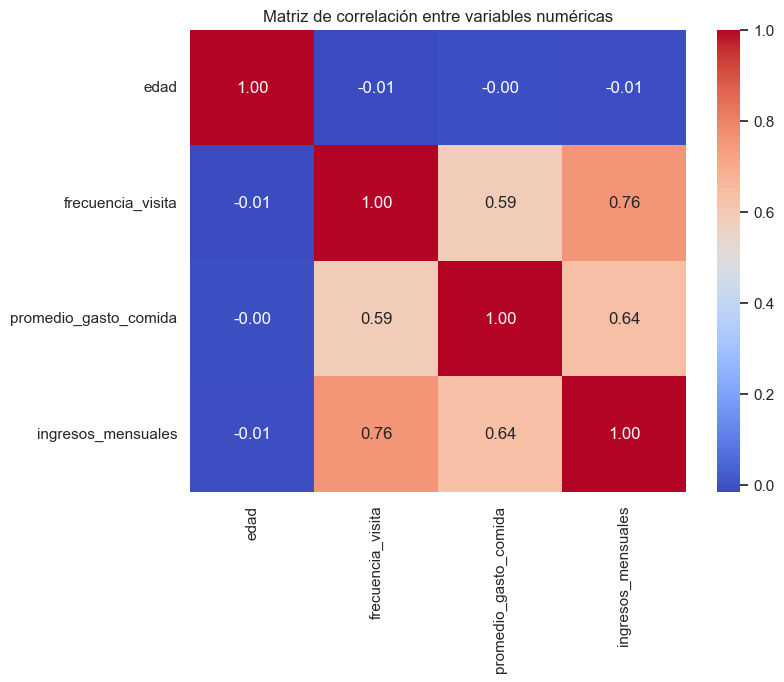

In [86]:
#Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


No se aprecia una correlación alta entre las variables numéricas, la más alta es ingresos_mensuales vs frecuencia_visita, lo cual tiene sentido ya que entre más ingresos tenga, mayor la oportunidad de visitar. Sin embargo, no supera el 80% de correlación, por lo que se decide dejarla. 

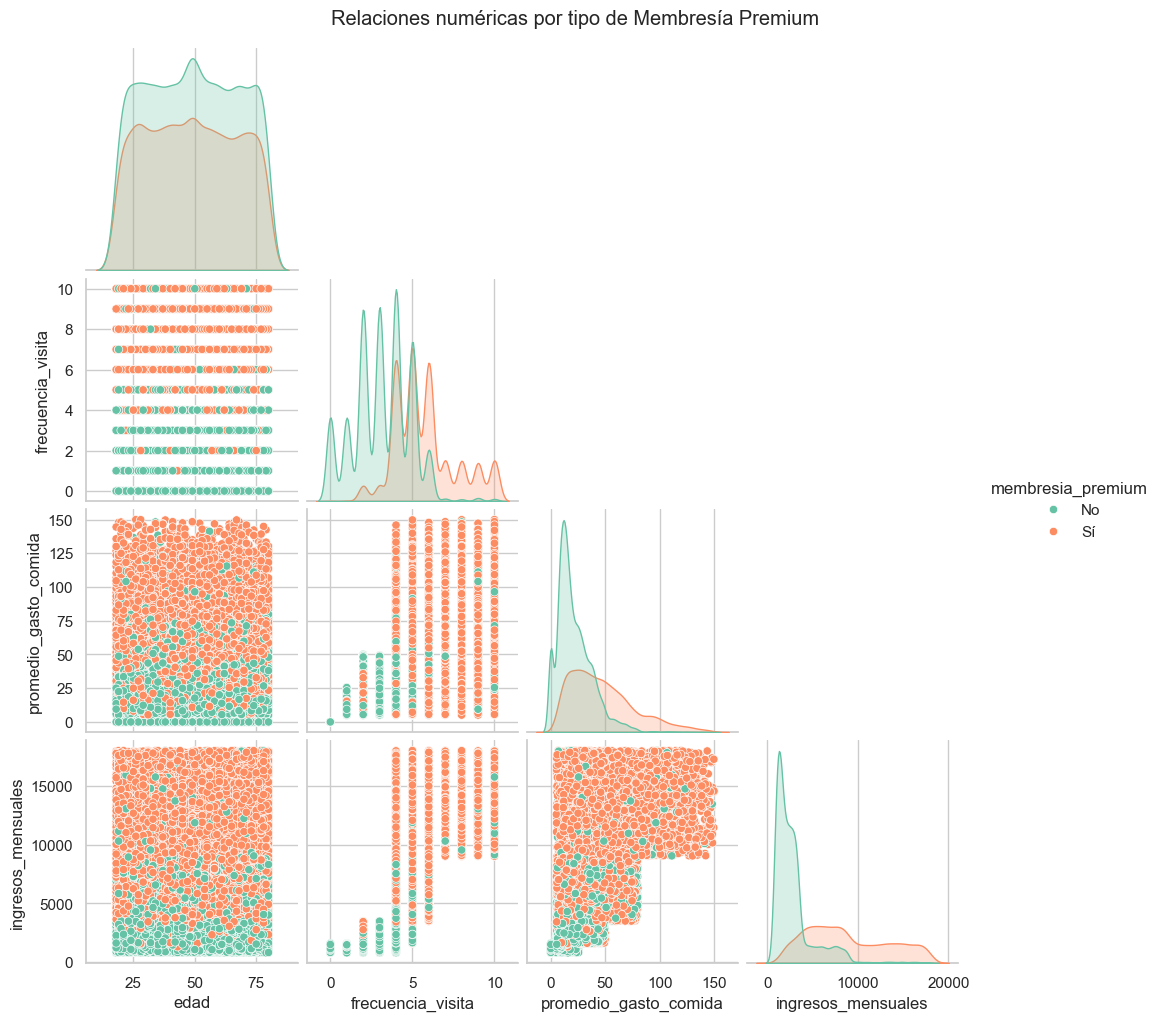

In [89]:
sns.pairplot(
    df,
    vars=num_cols,
    hue="membresia_premium",
    diag_kind="kde",
    palette="Set2",
    corner=True
)
plt.suptitle("Relaciones numéricas por tipo de Membresía Premium", y=1.02)
plt.show()

Principales hallazgos:

Ingresos mensuales y membresía premium:
Existe una clara separación visual entre ambos grupos. Los usuarios con membresía premium (color naranja) tienden a concentrarse en los niveles más altos de ingresos, mientras que los no premium (color verde) predominan en los tramos bajos. Esto reafirma que el nivel de ingreso es un fuerte indicador de la adquisición de la membresía.

Frecuencia de visita vs. promedio de gasto:
Se observa una relación positiva: a medida que aumenta la frecuencia de visitas, también lo hace el gasto promedio. Este patrón es más pronunciado en los usuarios premium, lo que sugiere un mayor compromiso y lealtad comercial.

Edad:
La variable edad no muestra una diferencia marcada entre ambos grupos. Tanto los usuarios premium como los no premium se distribuyen de forma similar, indicando que la edad no parece ser un factor determinante en la decisión de adquirir la membresía.

Distribuciones univariadas:
Los histogramas en la diagonal confirman que promedio_gasto_comida e ingresos_mensuales presentan asimetrías positivas. Además, los usuarios premium tienden a ubicarse consistentemente en los extremos superiores de gasto e ingreso.

In [92]:
pd.crosstab(
    [pd.cut(df["ingresos_mensuales"], bins=5), df["preferencias_alimenticias"]],
    df["membresia_premium"],
    normalize="index"
).round(2) * 100


membresia_premium                               No    Sí
ingresos_mensuales preferencias_alimenticias            
(782.801, 4239.8]  Carnes                     88.0  12.0
                   Mariscos                   86.0  14.0
                   Otro                       88.0  12.0
                   Pescado                    87.0  13.0
                   Vegano                     87.0  13.0
                   Vegetariano                86.0  14.0
(4239.8, 7679.6]   Carnes                     33.0  67.0
                   Mariscos                   30.0  70.0
                   Otro                       31.0  69.0
                   Pescado                    29.0  71.0
                   Vegano                     32.0  68.0
                   Vegetariano                29.0  71.0
(7679.6, 11119.4]  Carnes                     21.0  79.0
                   Mariscos                   19.0  81.0
                   Otro                       18.0  82.0
                   Pescado                    22.0  78.0
                   Vegano                     19.0  81.0
                   Vegetariano                18.0  82.0
(11119.4, 14559.2] Carnes                      5.0  95.0
                   Mariscos                    3.0  97.0
                   Otro                        5.0  95.0
                   Pescado                     4.0  96.0
                   Vegano                      6.0  94.0
                   Vegetariano                 5.0  95.0
(14559.2, 17999.0] Carnes                      5.0  95.0
                   Mariscos                    6.0  94.0
                   Otro                        3.0  97.0
                   Pescado                     3.0  97.0
                   Vegano                      2.0  98.0
                   Vegetariano                 5.0  95.0

Patrones destacados:

Existe una relación directamente proporcional entre los ingresos y la probabilidad de ser premium: a medida que aumentan los ingresos, la proporción de usuarios premium crece de forma consistente.

Las preferencias alimenticias (carnes, mariscos, vegetariano, etc.) no parecen influir significativamente en la decisión de ser premium. En todos los grupos, el ingreso mensual es el principal factor diferenciador.

Los usuarios con ingresos superiores a 11.000 unidades muestran casi universalmente membresía premium, lo que sugiere un umbral de ingreso a partir del cual la probabilidad de suscripción es muy alta.

Conclusiones


En primer lugar, el análisis univariado evidenció la presencia de algunas distribuciones asimétricas y valores atípicos en variables numéricas como ingresos_mensuales y promedio_gasto_comida, las cuales presentan una concentración en rangos bajos con colas extendidas hacia valores altos. Asimismo, se detectaron outliers extremos en edad (valores superiores a 300 años) Las variables categóricas, en general, mostraron distribuciones equilibradas, especialmente género y ocio.

En el análisis bivariable, se observó que los usuarios con membresía premium presentan mayores ingresos mensuales, un gasto promedio superior y una mayor frecuencia de visitas. Por el contrario, variables como edad, género o preferencias alimenticias mostraron relaciones débiles o no significativas con la variable objetivo.


En conclusión, el EDA revela que el perfil del cliente premium corresponde principalmente a personas con mayores ingresos, alta capacidad de gasto y frecuencia elevada de consumo, pertenecientes a estratos socioeconómicos medio-altos y altos. 